hello , iraq bagdata group
السلام عليكم  
على وعدنا اليوم نصور اول فيديو عربي يشرح  اساسيات الداتا ساينز
شنو الي راح نسوي اليوم
1- نتعرف على  kaggle
2- نزل داتا ست من كاجيل
3- نشوف شون نحلل البيانات
4- نشغل تعلم عميق نورال نيتورك على البيانات ونشوف شيطلع بيدنا

خلي نبلش
kaggle    اشرتها قوقول
تمثل منصة للشركات تعرض بياناتها يحللوها علماء البيانات الي ان شاء الله تكون انت احدهم مستقبلا
وتحاول تحل مشاكل علمية عملية

اول واهم داتا سيت تستخدمها كمبتديء هيه مشكلة التايتنك
راح تتعلم منها كل الاساسيات وبنفس الوقت المشكلة واقعه بدومين عام ماكو واحد بينا مايعرف قصة التايتنك

خل نشوف
سبق ومنزل الداتا خل نشوف شنسوي

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DataSet = pd.read_csv('train.csv')

DataSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


نعزل الواي نخلي بيه اليبلات ونعزل الاكس بي الفيشر الي نضن انو هيه مهمه
زين شون حنعرف هيه مهمه
هنا يدخل شي اسمه هندسة الخصائص
بس حسوي شي بسيط  حتى  نفهم شويا عن البيانات
لكن بشكل عام تحتاج تقرا الداتا زين وتفهمها حتى تختار افضل الخصائص كلما الخصائص  مضبوطة كلما نتائج التخمين 
للمودل مالتك تكون ادق

In [3]:
Y = DataSet.iloc[:,1].values
Y[0]

0

In [7]:
# i will take now for test age and pclass and see its effact
X = DataSet.iloc[:,[2 , 4 , 5]].values
X[0]

array([3, 'male', 22.0], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder 

labels_x = LabelEncoder()
X[:,1] = labels_x.fit_transform(X[:,1])
X

array([[3, 1, 22.0],
       [1, 0, 38.0],
       [3, 0, 26.0],
       ..., 
       [3, 0, nan],
       [1, 1, 26.0],
       [3, 1, 32.0]], dtype=object)

In [10]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN' , strategy="mean" , axis=0)
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])
X

array([[3.0, 1.0, 22.0],
       [1.0, 0.0, 38.0],
       [3.0, 0.0, 26.0],
       ..., 
       [3.0, 0.0, 29.69911764705882],
       [1.0, 1.0, 26.0],
       [3.0, 1.0, 32.0]], dtype=object)

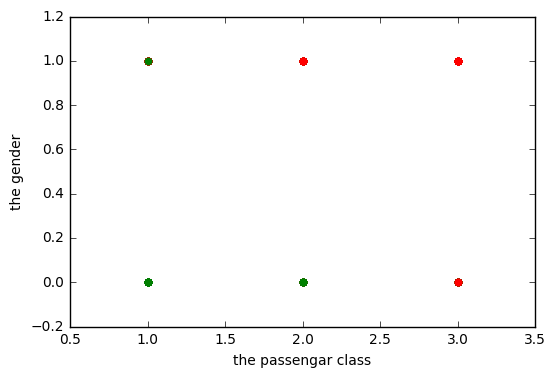

In [11]:
for i in xrange(Y.shape[0]):
    c = 'green'
    if Y[i] == 0:
        c = 'red'
    plt.scatter(X[i,0] , X[i,1] , color = c)
plt.xlabel('the passengar class')
plt.ylabel('the gender')
plt.legend()
plt.show()

شتلاحضون
الركاب بالمقصورات الاولى نسبة نجاتهم اكثر من المقصورات الدرجات الاقل منهم



خل نجرب ناخذ بعد خصائص

من الرسم هذا نلاحظ شغلة  عدد النساء 
او جندر امراءة اي كان طفلة شابة متزوجه المهم جنسها 
هنا نسبة نجاتهن اكثر من الرجال

هسه فهمنا انو البيانات الي اختارينها مؤثره
طبعا اكو بعد بيانات بس انت لازم تدرس بياناتكم المهم وتعرف تاثيرهن خل نكمل برمجة

In [13]:
X[0]

array([3.0, 1.0, 22.0], dtype=object)

In [14]:
from mamonAnn import mamonAnn , catgoricl , normalize , cost

X = catgoricl(X , 0)
X[0]

array([  0.,   0.,   1.,   1.,  22.])

حولت الداتا الي هيه من نوع كاتجوريكال
الى دمي فايربل
يعني لو عندي كتجوركل بهلشكل
a b c
0 1 0
يعني هاي من نوع بي
طبعا هسه لازم اسحب عنصر لان معادلة الاحتساب تضيف قيمة فلاطب بالدمي تراب اسحب عنصر اشفته


In [15]:
X = X[:,1:]
X[0]

array([  0.,   1.,   1.,  22.])

In [16]:
X.shape

(891, 4)

In [17]:
X = normalize(X)
X[0]

array([-0.54629938, -0.47604546, -0.47604546,  0.99928678])

الي سويته  سكيل للداتا حتى تساوى نوع الريناجات بالقيم 
معادلة السكيلر  الي استخدمتها هيه المعدل على انحراف

In [18]:
X[3]

array([-0.54629938, -0.54629938, -0.54629938,  1.91258769])

In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size = 0.20 , random_state=0)
print x_train[3]
print x_test[3]

[-0.54629938 -0.47604546 -0.47604546  0.85877895]
[-0.54629938 -0.54629938 -0.54629938  1.54017995]


In [21]:
deep = mamonAnn()
LL = []
deep.Layers(4 , [6 , 8 , 3 ] , 1)


lr     مقادر التعلم

,batch ,  كل شكد ونسوي تعلم
اني هنا حستخدم طريقة الري انفورسمينت
يعني كل ايتم نتعلم عليه
اكو طريقه اسمها الباتش واكو المني باتش يعني يقسم الى كل وجبة مثلا كل مية ايتم نتعلم 
reg ,  معامل الريجولايرايزيشن

factive , mid , last ,  هنا طرق الاكتفيشن فنكشن

LL  هاي مصفوفة اخلي بيها قيم الارور  اني هنا استخدم معادلة اسمه الكروس انتروبي
الي هيه سالب معدل لوغارتمات الهدف والبردكشن نشوفها اوضح

In [32]:
deep.fit(x_train , y_train , 600 , 100 , 0.003 ,1 , 0.0005 ,'sigmoid' , 'tanh' ,'sigmoid' , LL )

plt.plot(LL)
plt.show()

1.39649012727


mamonAnn.py:160: RuntimeWarning: invalid value encountered in log
  return -np.mean(T*np.log(Y) + (1-T)*np.log(1-Y))
mamonAnn.py:160: RuntimeWarning: divide by zero encountered in log
  return -np.mean(T*np.log(Y) + (1-T)*np.log(1-Y))
mamonAnn.py:160: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(T*np.log(Y) + (1-T)*np.log(1-Y))


nan
nan


KeyboardInterrupt: 

In [27]:
rate = np.mean(deep.out.round() == y_train)
rate

0.6165730337078652

In [29]:
deep.farowrds(x_test , 'sigmoid' , 'tanh' , 'sigmoid')

In [30]:
deep.out

array([[ 0.38353818],
       [ 0.38353818],
       [ 0.3859806 ],
       [ 0.38362766],
       [ 0.38361245],
       [ 0.38362029],
       [ 0.38272473],
       [ 0.38350733],
       [ 0.38408307],
       [ 0.38354756],
       [ 0.3838974 ],
       [ 0.38255932],
       [ 0.38353818],
       [ 0.38586553],
       [ 0.3841776 ],
       [ 0.38513923],
       [ 0.38420038],
       [ 0.38454172],
       [ 0.38305036],
       [ 0.38677184],
       [ 0.38465054],
       [ 0.38437948],
       [ 0.38353818],
       [ 0.38362029],
       [ 0.3842932 ],
       [ 0.38272473],
       [ 0.38332262],
       [ 0.3842932 ],
       [ 0.38391119],
       [ 0.38651804],
       [ 0.38323078],
       [ 0.38178552],
       [ 0.38370122],
       [ 0.38362029],
       [ 0.38360486],
       [ 0.3834029 ],
       [ 0.38236972],
       [ 0.38361447],
       [ 0.38391292],
       [ 0.38143368],
       [ 0.38116519],
       [ 0.38399723],
       [ 0.38353818],
       [ 0.38517056],
       [ 0.38314904],
       [ 0

In [31]:
rate = np.mean(deep.out.round() == y_test)
rate

0.61452513966480449

هنا نخلص
نسبة التخمين 61 بالمية طبعا اكو تحسينات تكدر تسويها 
اولا واهم شي اختيار الخصائص الصحيحة

ثانيا تعديل معمارية النيورال يعني هسه مثال انطيك

In [ ]:
aفت شون شمرت زايد الدالة بس غيرنا الاكتفيشن فنكشن صارت مو خوش نتائج 
نكدر نغير قيم التعلم او معامرية النيورال
واحسن شي نسوي  نسوي 
grid search
يعني نخلي اكثر من قيم ومعمارية وندخلهن لوب والحاسبة تجرب لحد متلكى الافضل

تحياتي الكم